
KNN Classifiers



The dataset comprises 8x8 pixel images of hand-written digits (0 through 9). Each image is represented as a 64-dimensional vector, where each dimension corresponds to a pixel's grayscale value.

### 1. Data Loading and Exploration

Data shape: (1797, 64)
Target shape: (1797,)


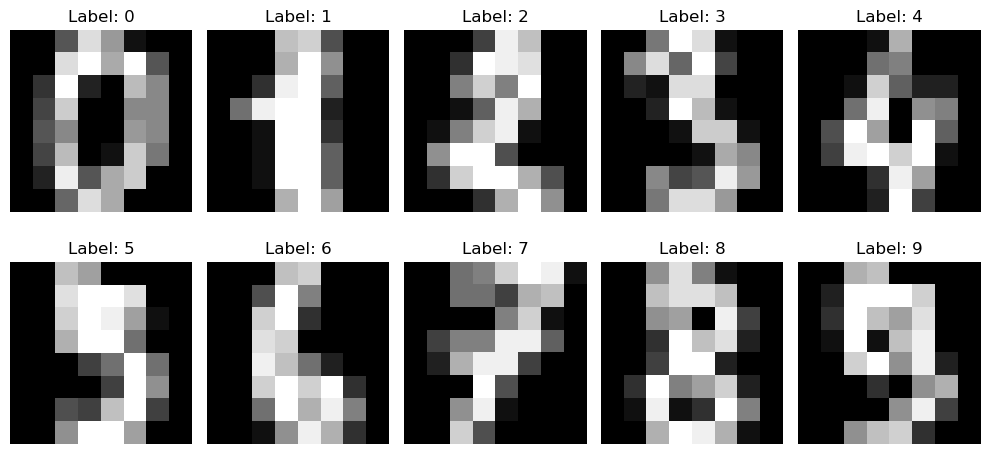

In [1]:
# Import necessary libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()

# Explore the dataset
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

# Visualize the first few images and their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap='gray')  
    ax.set_title(f"Label: {label}")  
    ax.axis('off') 
plt.tight_layout()
plt.show()


### 2. Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=10)

### 3. KNN Classification

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

# predict X_test and store it in y_pred
y_pred = knn.predict(X_test)

print("Predicted Value:", y_pred[:50])
print("Corresponding Correct values:", y_test[:50])

Predicted Value: [5 2 5 4 8 2 4 3 3 0 8 7 0 1 8 6 9 7 9 7 1 8 6 7 8 8 5 3 9 9 3 3 7 3 4 1 9
 2 5 4 2 1 0 9 2 3 6 1 9 4]
Corresponding Correct values: [5 2 5 4 8 2 4 3 3 0 8 7 0 1 8 6 9 7 9 7 1 8 6 7 8 8 5 3 5 9 3 3 7 3 4 1 9
 2 5 4 2 1 0 9 2 3 6 1 9 4]


### 4. Evaluation

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  1  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  1  0]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  1  0  1  0  0  0  0 48  0]
 [ 0  0  0  0  0  1  0  0  1 52]]


### 5. Experimenting with different k values

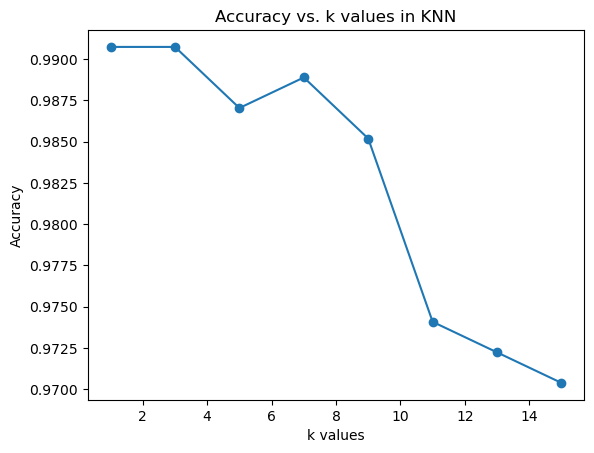

In [5]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in k_values:
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k values in KNN")
plt.show()